# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студентки гр. 2383 Анищенко Анастасия Ивановна и Бараева Елизавета Николаевна. Вариант №12.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Дискретный единичный скачок:

$ \sigma_d(k) =
\begin{cases}
1, & k \geq 0, \\
0, & k < 0,
\end{cases}
\quad k \in \mathbb{Z} $

Дискретный прямоугольный импульс:

$ s_1(k) =
\begin{cases}
U, & n_0 \le k \le n_0 + n_{imp} - 1, \\
0, & иначе
\end{cases} $

Линейная комбинация дискретных гармонических сигналов:

$ s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k), \enspace $ где $ \enspace x_i(k) = B_i sin(w_i k), \enspace i = 1, 2, 3 $

Дискретный гармонический сигнал:

$s(k) = C \cdot cos(w_0 k)$

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

In [6]:
import math as m
import cmath as cm
import numpy as np
import matplotlib.pyplot as plt


Nb = 12
N = 30 + Nb % 5
a = (-1) ** Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = m.pi / (6 + Nb % 5)
U = Nb % 20 + 1
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
w1 = m.pi / (4 + Nb % 5)
w2 = m.pi / (8 + Nb % 5)
w3 = m.pi / (16 + Nb % 5)
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5
print(f'Nb = {Nb}, N = {N}, a = {a}, C = {C}, w0 = {w0}, U = {U}, n0 = {n0}, n_imp = {n_imp}')
print(f'B1 = {B1}, B2 = {B2}, B3 = {B3}')
print(f'w1 = {w1}, w2 = {w2}, w3 = {w3}')
print(f'a1 = {a1}, a2 = {a2}, a3 = {a3}')

Nb = 12, N = 32, a = 0.8600000000000001, C = 3, w0 = 0.39269908169872414, U = 13, n0 = 5, n_imp = 7
B1 = 3.5, B2 = 3.7, B3 = 4.2
w1 = 0.5235987755982988, w2 = 0.3141592653589793, w3 = 0.17453292519943295
a1 = -0.5, a2 = 2.7, a3 = 3.4


In [7]:
# Функция дискретного единичного скачка
def sigma_d(k):
  return 1 if k >= 0 else 0

# Функция дискретного прямоугольного импульса
def s1(k):
  return U if n0 <= k <= n0 + n_imp - 1 else 0

# Гармонические сигналы
def x1(k):
  return B1 * np.sin(w1 * k)

def x2(k):
  return B2 * np.sin(w2 * k)

def x3(k):
  return B3 * np.sin(w3 * k)

# Функция линейной комбинации дискретных гармонических сигналов
def s2(k):
  return a1 * x1(k) + a2 * x2(k) + a3 * x3(k)

# Функция дискретного гармонического сигнала с экспоненциальной огибающей
def s3(k):
  return abs(a) ** k * C * np.cos(w0 * k)

# Функция периодической последовательности из пяти дискретных прямоугольных импульсов
def s4(k):
  return s1(k % (n_imp * 2))

# Функция рисования графика
def graph_build(x, y, title, xlabel, ylable):
  plt.figure()
  plt.stem(x, y, markerfmt=".")
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylable)
  plt.show()

## Задание 1

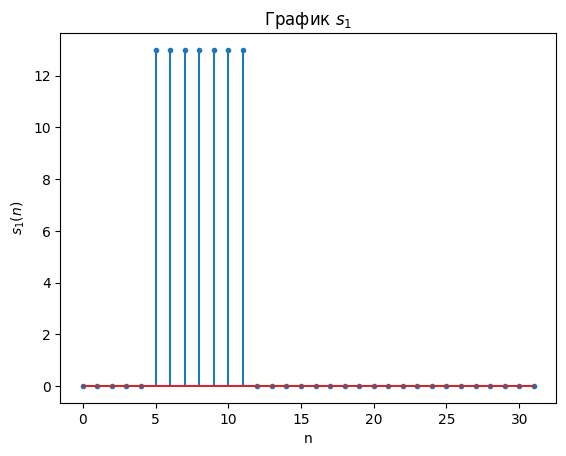

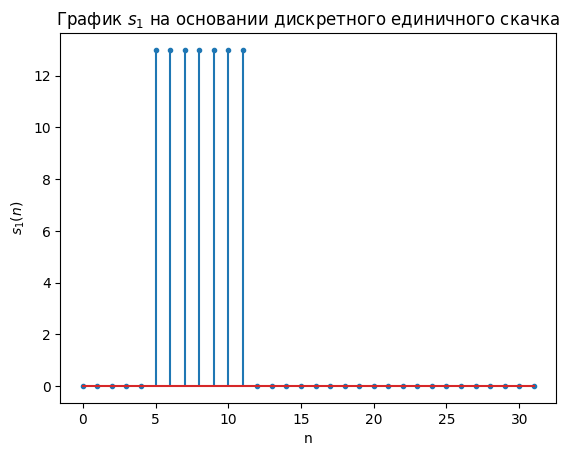

In [8]:
# Интервал времени
n = np.arange(N)

# Значения функций
Y_s1 = [s1(k) for k in n]
Y_sigma = [U * (sigma_d(k - n0) - sigma_d(k - (n0 + n_imp))) for k in n]

# График дискретного прямоугольного импульса s1
graph_build(n, Y_s1, 'График $s_1$', 'n', '$s_1(n)$')

# График дискретного прямоугольного импульса на основании дискретного единичного скачка
graph_build(n, Y_sigma, 'График $s_1$ на основании дискретного единичного скачка', 'n', '$s_1(n)$')

Мы смоделировали импульс на основе дискретного единичного скачка следующим образом:
$ s_1(k) = U \cdot (\sigma_d(k - n_0) - \sigma_d(k - (n_0 + n_{imp}))) $

Первая часть $\sigma_d(k - n_0)$ – это единичный скачок со сдвигом на $n_0$, вторая часть $\sigma_d (k - (n_0 + n_{imp}))$ – это единичный скачок со сдвигом на $n_0 + n_{imp}$. Разность этих двух частей дает прямоугольный импульс на интервале $n_0 \le k \le n_0 + n_{imp} - 1$, а умножение на $U$ увеличивает амплитуду импульса.

## Задание 2

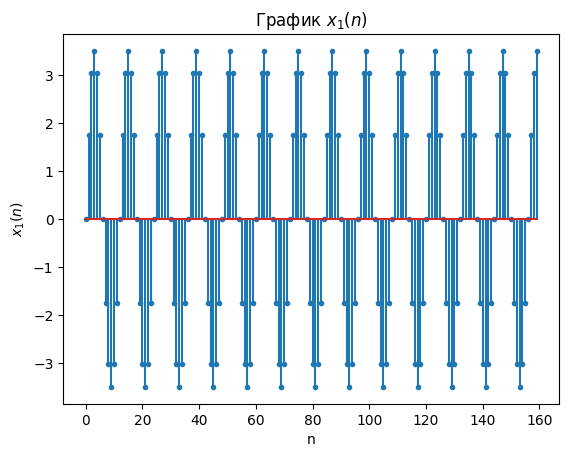

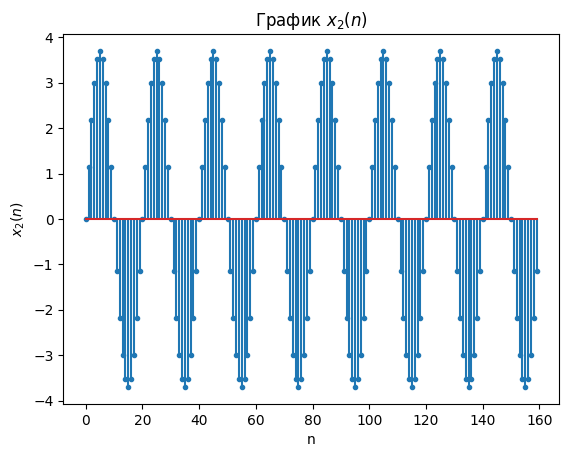

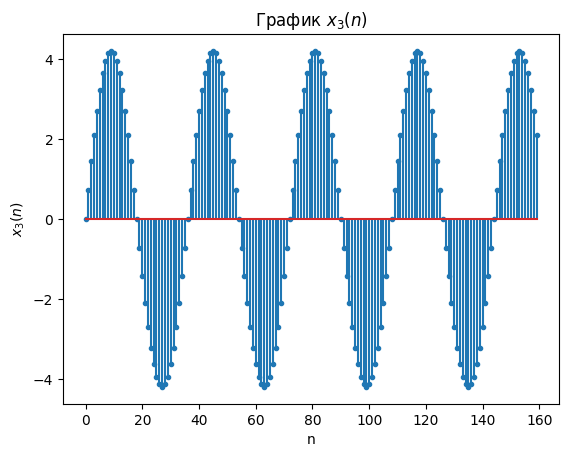

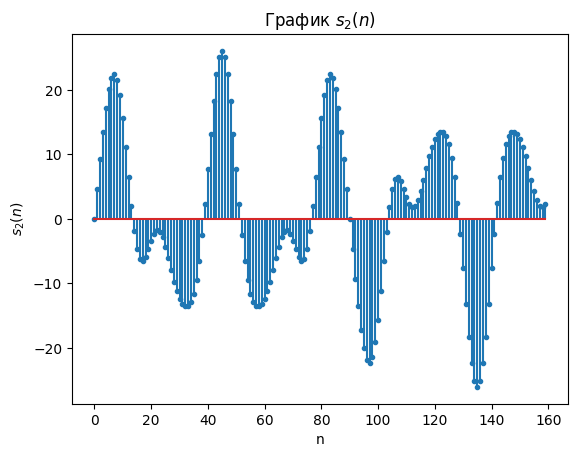

mean_s2 = 0.9482303675189669, E = 24233.79401294179, P = 151.46121258088618


In [9]:
# Интервал времени
n = np.arange(5 * N)

# Значения функций
Y_x1 = [x1(k) for k in n]
Y_x2 = [x2(k) for k in n]
Y_x3 = [x3(k) for k in n]
Y_s2 = [s2(k) for k in n]

# График гармонического сигнала x1
graph_build(n, Y_x1, 'График $x_1(n)$', 'n', '$x_1(n)$')

# График гармонического сигнала x2
graph_build(n, Y_x2, 'График $x_2(n)$', 'n', '$x_2(n)$')

# График гармонического сигнала x3
graph_build(n, Y_x3, 'График $x_3(n)$', 'n', '$x_3(n)$')

# График линейной комбинации дискретных гармонических сигналов
graph_build(n, Y_s2, 'График $s_2(n)$', 'n', '$s_2(n)$')

# Среднее значение последовательности s2
mean_s2 = sum(Y_s2) / (5 * N)

# Энергия последовательности s2
E = sum(i ** 2 for i in Y_s2)

# Средняя мощность последовательности s2
P = E / (5 * N)

print(f'mean_s2 = {mean_s2}, E = {E}, P = {P}')

a) Операции моделирования включают:
1. Формирование трех гармонических сигналов с различными амплитудами и частотами.
2. Умножение каждого гармонического сигнала на коэффициент $a_i$.
3. Получение итогового сигнала, где каждая синусоида накладывается друг на друга. В зависимости от фаз, частот и амплитуд одни участки усиливаются (когда синусоиды совпадают по знаку), а другие — ослабляются (когда они противоположны по знаку).

b) Среднее значение вычисляется как:

$ \frac{1}{5N} \sum_{k = 0}^{5N - 1} s_2(k) $

Энергия вычисляется как:

$ E = \sum_{k = 0}^{5N - 1} s^2_2(k) $

Средняя мощность вычисляется как:

$ P = \frac{1}{5N} \sum_{k = 0}^{5N - 1} s^2_2(k) = \frac{E}{5N} $



## Задание 3

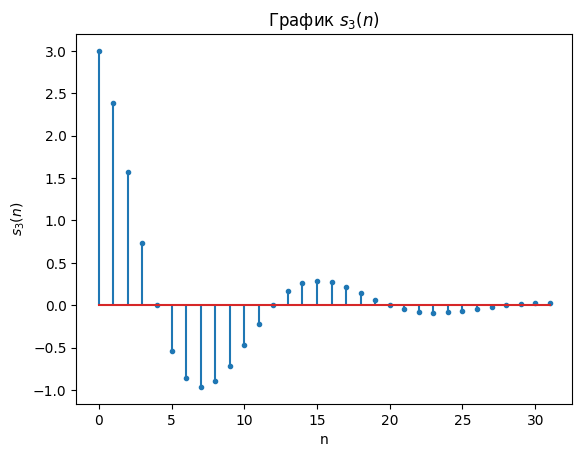

In [10]:
# Интервал времени
n = np.arange(N)

# Значение функции
Y_s3 = [s3(k) for k in n]

# График дискретного гармонического сигнала с экспоненциальной огибающей
graph_build(n, Y_s3, 'График $s_3(n)$', 'n', '$s_3(n)$')

Аналитическая формула дискретного сигнала $s_3(k)$ имеет вид:

$s_3(k) = |a|^k \cdot C \cdot cos(w_0k)$

Формируется гармонический сигнал с аплитудой $C$ и периодом, увеличенным за счет коэффициента $w_0$. Затем к нему применяется экспоненциальная огибающая $|a|^k$, которая изменяет амплитуду во времени, сигнал становится затухающим.

## Задание 4

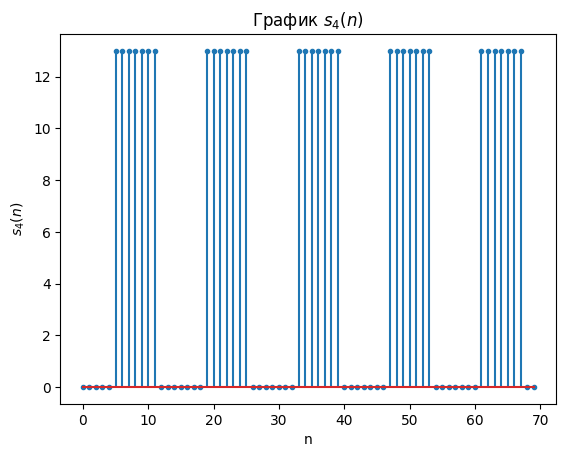

In [11]:
# Интервал времени
n = np.arange(5 * 2 * n_imp)

# Значение функции
Y_s4 = [s4(k) for k in n]

# График периодической последовательности из пяти дискретных прямоугольных импульсов
graph_build(n, Y_s4, 'График $s_4(n)$', 'n', '$s_4(n)$')

С помощью функции $s_1(k)$ задаются прямоугольные импульсы длины $n_{imp}$. Далее с помощью переданного аргументы $k \bmod 2n_{imp}$ в $s_1$ создается циклическое повторение исходного импульса с периодом $2n_{imp}$.

## Выводы

В ходе выполнения лабораторной работы были смоделированы дискретный прямоугольный импульс с помощью единичного скачка и линейная комбинация гармонических сигналов, для которой были вычислены следующие характеристики: среднее значение, энергия и мощность. Также был постоен график дискретного гармонического сигнала с экспоненциальной огибающей и график периодической последовательности из пяти дискретных прямоугольных импульсов. Для каждого пункта было объяснено моделирование дискретных последовательностей.